In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import networkx as nx
from networkx.algorithms import community

In [2]:
data = pd.read_csv('Transaction_data.csv', index_col=0)
data.head()

,merchant_id,recorded_date,TIME,issuer_id,amount
0,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-02,0 days 03:46:45,b92056d9-092b-4374-a84f-89304b67dec1,2.0
1,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-06,0 days 03:13:31,b92056d9-092b-4374-a84f-89304b67dec1,1.0
2,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-12,0 days 17:11:42,b92056d9-092b-4374-a84f-89304b67dec1,1.6
3,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-13,0 days 20:15:57,b92056d9-092b-4374-a84f-89304b67dec1,2.0
4,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-15,0 days 14:23:05,b92056d9-092b-4374-a84f-89304b67dec1,5.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779766 entries, 0 to 385874
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   merchant_id    779766 non-null  object 
 1   recorded_date  779766 non-null  object 
 2   TIME           779766 non-null  object 
 3   issuer_id      779766 non-null  object 
 4   amount         779766 non-null  float64
dtypes: float64(1), object(4)
memory usage: 35.7+ MB


In [4]:
data.describe()

,amount
count,779766.000000
mean,1859.580815
std,5162.457365
min,0.500000
25%,280.000000
50%,750.000000
75%,1844.200000
max,300000.000000


In [5]:
# data['TIME'] = data['TIME'].apply(lambda x: x.split(' ')[2])
# data['time'] = pd.to_datetime(data['recorded_date'] + ' ' + data['TIME'])
# data.drop('TIME', axis=1, inplace=True)
# data.drop('recorded_date', axis=1, inplace=True)

In [6]:
data

,merchant_id,TIME,issuer_id,amount
0,e9b9b629-1a76-42ce-9a73-60f395bd6717,0 days 03:46:45,b92056d9-092b-4374-a84f-89304b67dec1,2.0
1,e9b9b629-1a76-42ce-9a73-60f395bd6717,0 days 03:13:31,b92056d9-092b-4374-a84f-89304b67dec1,1.0
2,e9b9b629-1a76-42ce-9a73-60f395bd6717,0 days 17:11:42,b92056d9-092b-4374-a84f-89304b67dec1,1.6
3,e9b9b629-1a76-42ce-9a73-60f395bd6717,0 days 20:15:57,b92056d9-092b-4374-a84f-89304b67dec1,2.0
4,e9b9b629-1a76-42ce-9a73-60f395bd6717,0 days 14:23:05,b92056d9-092b-4374-a84f-89304b67dec1,5.0
...,...,...,...,...
385870,1b4804b2-3169-42a9-89a1-a88d440fc86a,0 days 12:37:58,b92056d9-092b-4374-a84f-89304b67dec1,5.0
385871,e838bcb3-b7c1-4897-940b-951122fed104,0 days 20:16:56,cf0e5a42-5aef-4e89-9a1d-ddabeb94a990,1.0
385872,e838bcb3-b7c1-4897-940b-951122fed104,0 days 19:54:59,b92056d9-092b-4374-a84f-89304b67dec1,16.0
385873,e838bcb3-b7c1-4897-940b-951122fed104,0 days 19:51:45,b92056d9-092b-4374-a84f-89304b67dec1,160.0


In [5]:
data.isnull().sum()

merchant_id      0
recorded_date    0
TIME             0
issuer_id        0
amount           0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(44)

In [7]:
duplicated_rows = data[data.duplicated() | data.duplicated(keep=False)]
duplicated_rows

,merchant_id,recorded_date,TIME,issuer_id,amount
125267,d6c954ba-ad46-4b07-9e67-5fca97ddec1b,2024-03-10,0 days 18:53:49,454fc705-41bc-4cf0-98cf-18b8702b55a5,85.0
125407,d6c954ba-ad46-4b07-9e67-5fca97ddec1b,2024-03-10,0 days 18:53:49,454fc705-41bc-4cf0-98cf-18b8702b55a5,85.0
145022,d6c954ba-ad46-4b07-9e67-5fca97ddec1b,2024-03-15,0 days 20:41:50,b9444959-271c-46d1-b8ee-264f87e857b5,240.0
145660,d6c954ba-ad46-4b07-9e67-5fca97ddec1b,2024-03-15,0 days 20:41:50,b9444959-271c-46d1-b8ee-264f87e857b5,240.0
161101,3983f763-aab6-43d2-adea-5a5ed4cee849,2024-03-02,0 days 13:50:52,e17695d5-eea1-43d4-b2fe-d7447ab7870a,27.0
...,...,...,...,...,...
317922,5cf79596-fe67-489c-af3f-81e33759f50b,2024-03-30,0 days 18:51:58,716ec428-e9d1-4e6d-8f91-2cd421ecf6bf,180.0
330405,5d8c8fd5-76d1-4f6b-a88b-0e44c99f018f,2024-03-28,0 days 10:43:14,8089b668-ea24-4440-b6b0-10bdde80fd36,1.0
330409,5d8c8fd5-76d1-4f6b-a88b-0e44c99f018f,2024-03-28,0 days 10:43:14,8089b668-ea24-4440-b6b0-10bdde80fd36,1.0
361187,14881b80-b077-4178-a3a6-38e72bbc655a,2024-03-16,0 days 17:44:05,e17695d5-eea1-43d4-b2fe-d7447ab7870a,1000.0


In [8]:
data = data.drop_duplicates()
data

,merchant_id,recorded_date,TIME,issuer_id,amount
0,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-02,0 days 03:46:45,b92056d9-092b-4374-a84f-89304b67dec1,2.0
1,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-06,0 days 03:13:31,b92056d9-092b-4374-a84f-89304b67dec1,1.0
2,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-12,0 days 17:11:42,b92056d9-092b-4374-a84f-89304b67dec1,1.6
3,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-13,0 days 20:15:57,b92056d9-092b-4374-a84f-89304b67dec1,2.0
4,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-15,0 days 14:23:05,b92056d9-092b-4374-a84f-89304b67dec1,5.0
...,...,...,...,...,...
385870,1b4804b2-3169-42a9-89a1-a88d440fc86a,2024-03-28,0 days 12:37:58,b92056d9-092b-4374-a84f-89304b67dec1,5.0
385871,e838bcb3-b7c1-4897-940b-951122fed104,2024-03-31,0 days 20:16:56,cf0e5a42-5aef-4e89-9a1d-ddabeb94a990,1.0
385872,e838bcb3-b7c1-4897-940b-951122fed104,2024-03-31,0 days 19:54:59,b92056d9-092b-4374-a84f-89304b67dec1,16.0
385873,e838bcb3-b7c1-4897-940b-951122fed104,2024-03-31,0 days 19:51:45,b92056d9-092b-4374-a84f-89304b67dec1,160.0


In [9]:
data.nunique()

merchant_id       1164
recorded_date       33
TIME             73054
issuer_id           72
amount           78696
dtype: int64

In [10]:
data.columns

Index(['merchant_id', 'recorded_date', 'TIME', 'issuer_id', 'amount'], dtype='object')

In [11]:
data['recorded_date'] = pd.to_datetime(data['recorded_date'])
data['amount_zscore'] = (data['amount'] - data['amount'].mean()) / data['amount'].std()
suspicious_transactions_zscore = data[np.abs(data['amount_zscore']) > 3]

print("Suspicious Transactions based on Z-Score:")
suspicious_transactions_zscore

Suspicious Transactions based on Z-Score:


,merchant_id,recorded_date,TIME,issuer_id,amount,amount_zscore
65,bb11708d-0c14-473b-b312-b5ad0568215c,2024-02-28,0 days 21:48:24,b9444959-271c-46d1-b8ee-264f87e857b5,19421.0,3.401652
195,bb11708d-0c14-473b-b312-b5ad0568215c,2024-02-29,0 days 20:45:04,e398055b-ce16-498f-928a-0fb6d289dc16,24640.0,4.412579
253,bb11708d-0c14-473b-b312-b5ad0568215c,2024-02-29,0 days 18:19:40,b9444959-271c-46d1-b8ee-264f87e857b5,24228.0,4.332774
294,bb11708d-0c14-473b-b312-b5ad0568215c,2024-02-29,0 days 21:44:55,bb6946e4-3b21-4185-ac59-e0a2dd7d9769,67833.0,12.779118
393,bb11708d-0c14-473b-b312-b5ad0568215c,2024-03-01,0 days 21:35:51,867a6ea6-26bd-418a-ad32-82723d5272f3,20245.0,3.561262
...,...,...,...,...,...,...
385486,f5f8d126-e87d-4a81-865a-1ea39baf401e,2024-03-28,0 days 09:39:29,bb6946e4-3b21-4185-ac59-e0a2dd7d9769,23400.0,4.172389
385491,f5f8d126-e87d-4a81-865a-1ea39baf401e,2024-03-29,0 days 18:02:34,15a5d3ba-99d3-43c4-9594-099f6d48f96b,28432.0,5.147094
385493,f5f8d126-e87d-4a81-865a-1ea39baf401e,2024-03-30,0 days 08:35:31,d203826a-fc87-4ae1-9e61-9f0597f8809b,29186.0,5.293145
385498,f5f8d126-e87d-4a81-865a-1ea39baf401e,2024-03-30,0 days 10:29:09,305377b2-2a0b-4f88-a566-0a34d828e23a,23730.0,4.236311


In [12]:
model = IsolationForest(contamination=0.01)  # Assume 1% 
data['amount_score'] = model.fit_predict(data[['amount']])
suspicious_transactions_iforest = data[data['amount_score'] == -1]

print("Suspicious Transactions based on Isolation Forest:")
suspicious_transactions_iforest

Suspicious Transactions based on Isolation Forest:


,merchant_id,recorded_date,TIME,issuer_id,amount,amount_zscore,amount_score
65,bb11708d-0c14-473b-b312-b5ad0568215c,2024-02-28,0 days 21:48:24,b9444959-271c-46d1-b8ee-264f87e857b5,19421.0,3.401652,-1
195,bb11708d-0c14-473b-b312-b5ad0568215c,2024-02-29,0 days 20:45:04,e398055b-ce16-498f-928a-0fb6d289dc16,24640.0,4.412579,-1
253,bb11708d-0c14-473b-b312-b5ad0568215c,2024-02-29,0 days 18:19:40,b9444959-271c-46d1-b8ee-264f87e857b5,24228.0,4.332774,-1
294,bb11708d-0c14-473b-b312-b5ad0568215c,2024-02-29,0 days 21:44:55,bb6946e4-3b21-4185-ac59-e0a2dd7d9769,67833.0,12.779118,-1
393,bb11708d-0c14-473b-b312-b5ad0568215c,2024-03-01,0 days 21:35:51,867a6ea6-26bd-418a-ad32-82723d5272f3,20245.0,3.561262,-1
...,...,...,...,...,...,...,...
385491,f5f8d126-e87d-4a81-865a-1ea39baf401e,2024-03-29,0 days 18:02:34,15a5d3ba-99d3-43c4-9594-099f6d48f96b,28432.0,5.147094,-1
385493,f5f8d126-e87d-4a81-865a-1ea39baf401e,2024-03-30,0 days 08:35:31,d203826a-fc87-4ae1-9e61-9f0597f8809b,29186.0,5.293145,-1
385498,f5f8d126-e87d-4a81-865a-1ea39baf401e,2024-03-30,0 days 10:29:09,305377b2-2a0b-4f88-a566-0a34d828e23a,23730.0,4.236311,-1
385588,c3dd4898-b103-4836-be37-e3a109192fa8,2024-03-31,0 days 05:26:31,37c5a180-d466-408d-8c67-124721434e18,17290.0,2.988875,-1


In [13]:
aggregated_data = data.groupby('recorded_date')['amount'].sum()

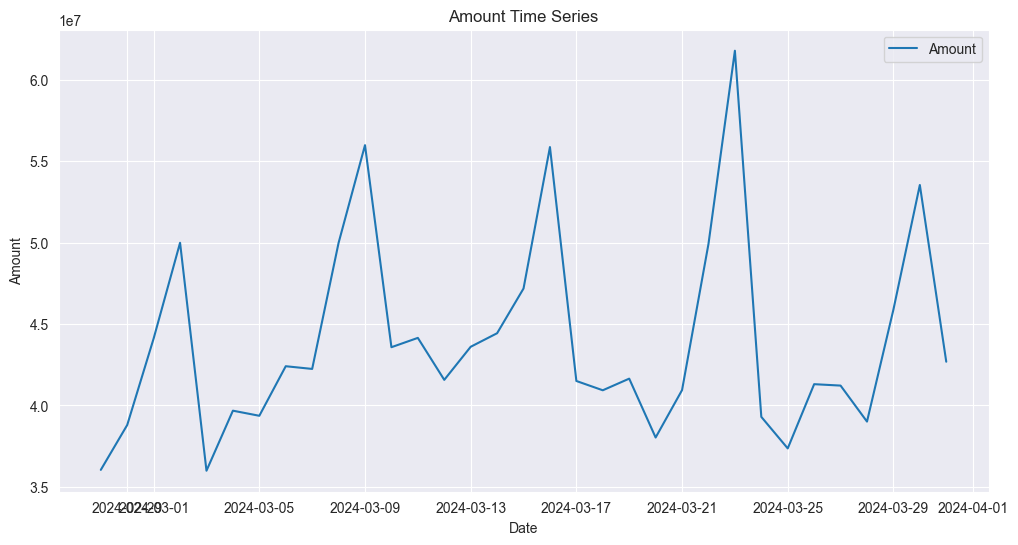

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data, label='Amount')
plt.title('Amount Time Series')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

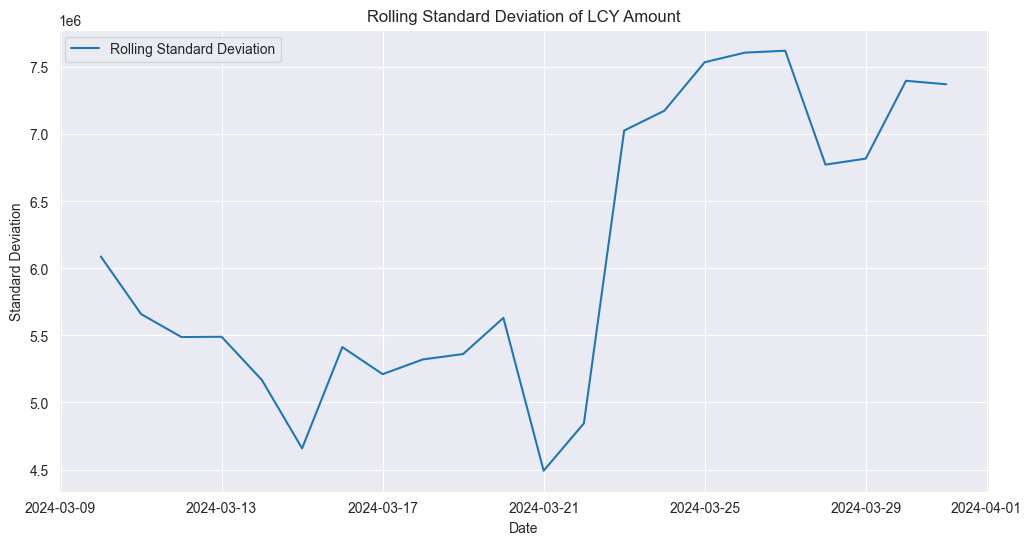

In [15]:
rolling_std = aggregated_data.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.title('Rolling Standard Deviation of LCY Amount')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

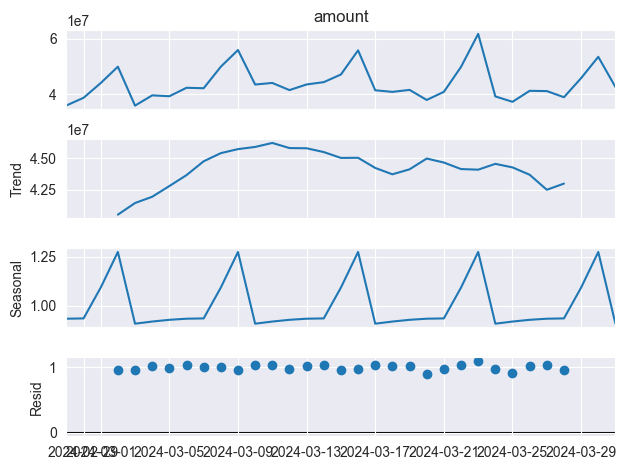

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(aggregated_data, model='multiplicative', period=7)
fig = decomposition.plot()
plt.show()

In [18]:
G = nx.Graph()

for index, row in data.iterrows():
    G.add_edge(row['merchant_id'], row['issuer_id'], weight=row['amount'])

In [19]:
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

In [20]:
print("Centrality:")
for node, cent in sorted_centrality:
    print(f"Node: {node}, Centrality: {cent}")

Centrality:
Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, Centrality: 0.7951417004048583
Node: b92056d9-092b-4374-a84f-89304b67dec1, Centrality: 0.7910931174089069
Node: 1ddbeb18-a18a-4540-bfcd-6e5796a89019, Centrality: 0.6582995951417003
Node: b9444959-271c-46d1-b8ee-264f87e857b5, Centrality: 0.6404858299595142
Node: 305377b2-2a0b-4f88-a566-0a34d828e23a, Centrality: 0.6121457489878542
Node: cf0e5a42-5aef-4e89-9a1d-ddabeb94a990, Centrality: 0.588663967611336
Node: 12163973-2702-4645-b87a-a9cd109f2fc4, Centrality: 0.5530364372469635
Node: e398055b-ce16-498f-928a-0fb6d289dc16, Centrality: 0.5522267206477732
Node: bb6946e4-3b21-4185-ac59-e0a2dd7d9769, Centrality: 0.5376518218623482
Node: 716ec428-e9d1-4e6d-8f91-2cd421ecf6bf, Centrality: 0.5336032388663967
Node: 28125faa-cc41-457d-8966-60849300b80a, Centrality: 0.5295546558704454
Node: 15a5d3ba-99d3-43c4-9594-099f6d48f96b, Centrality: 0.5093117408906882
Node: 37c5a180-d466-408d-8c67-124721434e18, Centrality: 0.5052631578947369
Node: 51db167c

In [21]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted_communities = sorted(map(sorted, next_level_communities))

In [22]:
print("Communities:")
for community in sorted_communities:
    print(community)

Communities:
['001cb5a9-0d00-42ef-90e4-f25b0c964bbf', '00369301-6b29-41c3-b37a-5d1f9b782d9b', '00524c08-cbbe-4ccc-a0c4-8d1bef218908', '009c1279-8a1a-40cf-a83b-ccc05420f570', '00b01a2e-285f-48b1-9021-0628f8a43125', '00b3f6c5-6039-4b2c-b456-0f43cc20249f', '010e1caa-71f1-435a-8ac9-f53196cb46f1', '015252c0-ee38-44db-8204-c7969f1a21b5', '015e4bf2-f91b-46ba-8fc0-98567f465874', '01655b39-a477-4925-98f2-4345a08db41e', '01970e29-eba1-4c7b-9345-59b360ede907', '01cd305a-2726-4e63-a9a5-6a50005abf4a', '020f022d-3ef4-4f1b-a34b-093481fe3d77', '025bd7f8-8270-49f9-ade1-888db1953948', '026223bc-3643-4390-9465-1afb887b5f18', '02a12003-4d37-4940-9a0c-628be574fc84', '031da543-5700-4b59-b173-49b2b568c3b3', '031e18ac-84be-47a3-8749-b7b0a20e31d8', '036d3041-08ba-472d-8017-ed234260025a', '038a2b15-e6a0-4529-9a30-c8c995fc3912', '03f48d59-c983-4e4f-8ff1-463fac13a342', '043adc8d-9b4b-4bc8-8de3-2be96180621d', '044a818a-fdd7-4317-8842-630d8b330613', '044da725-20a2-4364-bf61-397bc4035205', '048db067-2f9d-472d-a8b0-3

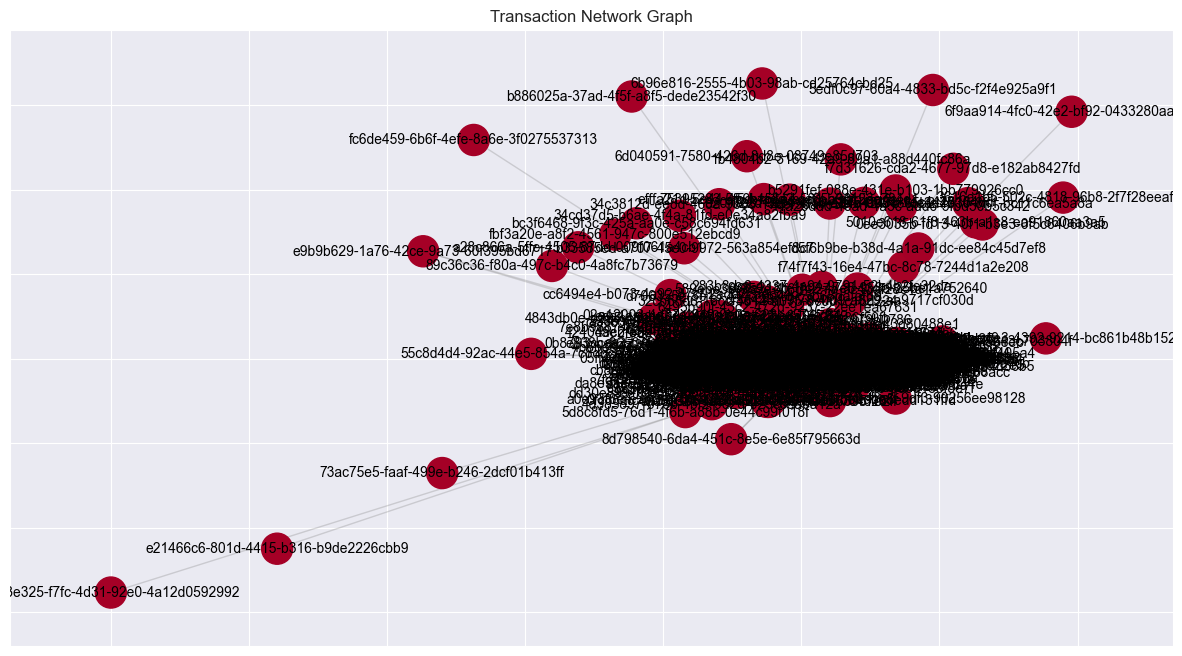

In [23]:
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 8))

node_colors = [centrality[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=500, cmap=plt.cm.RdYlBu, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Transaction Network Graph')
plt.show()

In [24]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

In [25]:
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

In [26]:
print("Top Degree Centrality Nodes:")
for node, centrality in top_degree:
    print(f"Node: {node}, Centrality: {centrality}")

Top Degree Centrality Nodes:
Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, Centrality: 0.7951417004048583
Node: b92056d9-092b-4374-a84f-89304b67dec1, Centrality: 0.7910931174089069
Node: 1ddbeb18-a18a-4540-bfcd-6e5796a89019, Centrality: 0.6582995951417003
Node: b9444959-271c-46d1-b8ee-264f87e857b5, Centrality: 0.6404858299595142
Node: 305377b2-2a0b-4f88-a566-0a34d828e23a, Centrality: 0.6121457489878542
Node: cf0e5a42-5aef-4e89-9a1d-ddabeb94a990, Centrality: 0.588663967611336
Node: 12163973-2702-4645-b87a-a9cd109f2fc4, Centrality: 0.5530364372469635
Node: e398055b-ce16-498f-928a-0fb6d289dc16, Centrality: 0.5522267206477732
Node: bb6946e4-3b21-4185-ac59-e0a2dd7d9769, Centrality: 0.5376518218623482
Node: 716ec428-e9d1-4e6d-8f91-2cd421ecf6bf, Centrality: 0.5336032388663967


Nodes with high degree centrality have many connections. In the context of transactions, these might be merchants or issuers with unusually high activity

In [27]:
print("\nTop Betweenness Centrality Nodes:")
for node, centrality in top_betweenness:
    print(f"Node: {node}, Centrality: {centrality}")


Top Betweenness Centrality Nodes:
Node: b92056d9-092b-4374-a84f-89304b67dec1, Centrality: 0.2736016178439309
Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, Centrality: 0.13859331238186426
Node: 1ddbeb18-a18a-4540-bfcd-6e5796a89019, Centrality: 0.056231600865348036
Node: b9444959-271c-46d1-b8ee-264f87e857b5, Centrality: 0.05374187585232817
Node: 305377b2-2a0b-4f88-a566-0a34d828e23a, Centrality: 0.04888761959945664
Node: cf0e5a42-5aef-4e89-9a1d-ddabeb94a990, Centrality: 0.042400367317329796
Node: 12163973-2702-4645-b87a-a9cd109f2fc4, Centrality: 0.03889974926193911
Node: e398055b-ce16-498f-928a-0fb6d289dc16, Centrality: 0.03180384479795026
Node: 716ec428-e9d1-4e6d-8f91-2cd421ecf6bf, Centrality: 0.030742011787045206
Node: bb6946e4-3b21-4185-ac59-e0a2dd7d9769, Centrality: 0.029548980359540605


Nodes with high betweenness centrality act as bridges in the network, meaning they might be crucial points for the flow of transactions. Unusual patterns here could indicate suspicious activity.

In [28]:
print("\nTop Closeness Centrality Nodes:")
for node, centrality in top_closeness:
    print(f"Node: {node}, Centrality: {centrality}")


Top Closeness Centrality Nodes:
Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, Centrality: 0.7395209580838323
Node: b92056d9-092b-4374-a84f-89304b67dec1, Centrality: 0.7351190476190477
Node: 1ddbeb18-a18a-4540-bfcd-6e5796a89019, Centrality: 0.6138170974155069
Node: b9444959-271c-46d1-b8ee-264f87e857b5, Centrality: 0.60068093385214
Node: 305377b2-2a0b-4f88-a566-0a34d828e23a, Centrality: 0.5819981149858624
Node: cf0e5a42-5aef-4e89-9a1d-ddabeb94a990, Centrality: 0.5665137614678899
Node: 12163973-2702-4645-b87a-a9cd109f2fc4, Centrality: 0.5435739436619719
Node: e398055b-ce16-498f-928a-0fb6d289dc16, Centrality: 0.5430958663148637
Node: bb6946e4-3b21-4185-ac59-e0a2dd7d9769, Centrality: 0.5346320346320347
Node: 716ec428-e9d1-4e6d-8f91-2cd421ecf6bf, Centrality: 0.5323275862068966


Nodes with high closeness centrality are close to all other nodes, which might indicate key players in the transaction network

In [29]:

transaction_amounts = [data['weight'] for _, _, data in G.edges(data=True)]
mean_amount = np.mean(transaction_amounts)
std_amount = np.std(transaction_amounts)
threshold = mean_amount + 3 * std_amount

outliers = [(u, v, data['weight']) for u, v, data in G.edges(data=True) if data['weight'] > threshold]
print(len(outliers))
print("\nSuspicious Transactions (Outliers based on amount):")
for u, v, amount in outliers:
    print(f"From Node: {u}, To Node: {v}, Amount: {amount}")


258

Suspicious Transactions (Outliers based on amount):
From Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, To Node: 6a083330-a380-435c-9e52-01b3fe1eeaeb, Amount: 46023.0
From Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, To Node: 95e842a7-b21a-42eb-a59a-68acaf9d8a8e, Amount: 30000.0
From Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, To Node: 1ea84f58-a61e-4889-a987-cfcf97c6bc2a, Amount: 117000.0
From Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, To Node: 87f4c20f-34fd-4d86-bde4-0583aaa185bd, Amount: 47564.0
From Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, To Node: 28ca31c5-cb44-4802-baac-b1b10a1bd5ee, Amount: 30000.0
From Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, To Node: bfcf4c17-2461-4454-a7e2-682275206058, Amount: 39500.0
From Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, To Node: 3fa87278-4b81-49df-8944-8ae7c0d66679, Amount: 70000.0
From Node: e17695d5-eea1-43d4-b2fe-d7447ab7870a, To Node: 313d1d09-a741-43e0-a842-571ccf20236f, Amount: 40000.0
From Node: cf0e5a42-5aef-4e89-9a1d-ddabeb94a99

In [30]:
cycles = []
for cycle in nx.simple_cycles(G):
    if len(cycle) <= 4:
        cycles.append(cycle)

KeyboardInterrupt: 

After finding cycles upto length 4, we can find those cycles where transaction happened within a time threshold.

In [33]:
data.sort_values(by='TIME', inplace=True)
data

,merchant_id,recorded_date,TIME,issuer_id,amount,amount_zscore,amount_score
345348,976950ec-2f90-4aec-8905-03d897944747,2024-03-06,0 days 00:00:01,c43b0413-5b1a-412b-aa47-70e645f8f150,1800.0,-0.011558,1
192672,95e030b0-ef4a-4bf3-8027-3efc99ee71b2,2024-03-25,0 days 00:00:02,e17695d5-eea1-43d4-b2fe-d7447ab7870a,1250.0,-0.118094,1
76557,e5fb8e68-f5fe-4975-9e52-a9eb45c124f6,2024-03-09,0 days 00:00:02,175e9592-1b2f-45b4-83bc-06634408bd70,360.0,-0.290488,1
336912,976950ec-2f90-4aec-8905-03d897944747,2024-03-23,0 days 00:00:02,bb6946e4-3b21-4185-ac59-e0a2dd7d9769,6500.0,0.898838,1
338745,976950ec-2f90-4aec-8905-03d897944747,2024-03-30,0 days 00:00:02,716ec428-e9d1-4e6d-8f91-2cd421ecf6bf,1800.0,-0.011558,1
...,...,...,...,...,...,...,...
345105,976950ec-2f90-4aec-8905-03d897944747,2024-03-05,0 days 23:59:56,b9444959-271c-46d1-b8ee-264f87e857b5,900.0,-0.185889,1
337647,976950ec-2f90-4aec-8905-03d897944747,2024-03-24,0 days 23:59:56,15a5d3ba-99d3-43c4-9594-099f6d48f96b,1800.0,-0.011558,1
337986,976950ec-2f90-4aec-8905-03d897944747,2024-03-24,0 days 23:59:57,e17695d5-eea1-43d4-b2fe-d7447ab7870a,5250.0,0.656711,1
181404,d75484b3-7af3-4dc6-a83b-2a231472621f,2024-03-15,0 days 23:59:57,d203826a-fc87-4ae1-9e61-9f0597f8809b,2400.0,0.104663,1


In [34]:
from collections import defaultdict

def analyze_sequence_patterns(df, sequence_length=3):
    issuer_sequences = defaultdict(list)
    grouped = df.groupby('issuer_id')

    for issuer_id, group in grouped:
        transactions = group['merchant_id'].tolist()
        for i in range(len(transactions) - sequence_length + 1):
            sequence = tuple(transactions[i:i+sequence_length])
            issuer_sequences[issuer_id].append(sequence)

    return issuer_sequences

issuer_sequences = analyze_sequence_patterns(data)

print("\nSequence Patterns:")
for issuer_id, sequences in issuer_sequences.items():
    print(f"Issuer ID: {issuer_id}, Sequences: {sequences}")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [35]:
def identify_unusual_sequences(issuer_sequences, threshold=0.1):
    unusual_sequences = []

    sequence_counts = defaultdict(int)
    total_sequences = 0

    for issuer_id, sequences in issuer_sequences.items():
        for sequence in sequences:
            sequence_counts[sequence] += 1
            total_sequences += 1

    for sequence, count in sequence_counts.items():
        if count / total_sequences < threshold:
            unusual_sequences.append((sequence, count / total_sequences))

    return unusual_sequences

unusual_sequences = identify_unusual_sequences(issuer_sequences)

print("\nUnusual Sequences:")
for sequence, frequency in unusual_sequences:
    print(f"Sequence: {sequence}, Frequency: {frequency}")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [36]:
len(unusual_sequences) 

256870

#### Conclusions cannot be drawn.